## 1. Importing all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as pt

## 2. Importing Dataset

In [2]:
claimants_data=pd.read_csv('claimants.csv')

In [3]:
claimants_data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


## 3. Initial Investigation

In [4]:
claimants_data.shape

(1340, 7)

In [5]:
claimants_data.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

## 4. Data Processing/Preparation

In [4]:
del claimants_data['CASENUM']

In [5]:
claimants_data.dropna(axis=0,inplace=True)

In [6]:
claimants_data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [9]:
claimants_data.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [10]:
claimants_data.shape

(1096, 6)

In [11]:
claimants_data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [12]:
claimants_data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


## 5. Model Building

In [7]:
X=claimants_data.iloc[:,1:]
y=claimants_data[['ATTORNEY']]

In [8]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [9]:
y

,ATTORNEY
0,0
1,1
2,1
3,0
4,1
...,...
1334,1
1336,0
1337,1
1338,0


## K-fold Cross Validation-Building,Train,Test

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_model = LogisticRegression()  # estimator
cv_score=cross_val_score(estimator=log_model,X=X,y=y,cv=5)#Fitting,Training,Testing
print("CV Score for 5 Fold={}\nMean Accuracy={}\nDeviation={}".format(cv_score,cv_score.mean(),cv_score.std()))

CV Score for 5 Fold=[0.71363636 0.69863014 0.69863014 0.70319635 0.70776256]
Mean Accuracy=0.7043711083437111
Deviation=0.005738369952269936


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(876, 5)
(220, 5)
(876, 1)
(220, 1)


## 6. Model Training

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Logistic Regression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

#Decision Tree Classifer
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=12)#Pruning
dt_model.fit(X_train,y_train)

#Random Forest Classifier
rf_model=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,)
rf_model.fit(X_train,y_train)

RandomForestClassifier()

## 7. Model Testing

#### 7.1 Training Data

In [23]:
#Logistic Model
y_pred_train_log=log_model.predict(X_train)

#DT Classifier
y_pred_train_dt=dt_model.predict(X_train)

#RF Classifier
y_pred_train_rf=rf_model.predict(X_train)

#### 7.2 Testing Data

In [24]:
#Logistic Model
y_pred_test_log=log_model.predict(X_test)

#DT Classifier
y_pred_test_dt=dt_model.predict(X_test)

#RF Classifier
y_pred_test_rf=rf_model.predict(X_test)

## Hyper Parameter and Grid Search CV

#### Grid Search CV for DT

In [20]:
from sklearn.model_selection import GridSearchCV
grid_model_dt=GridSearchCV(estimator=dt_model,param_grid={'criterion':['gini','entropy'],
                                            'max_depth':[3,5,7,8,10],
                                            'min_samples_split':[2,3,4]})
grid_model_dt.fit(X_train,y_train)
print(grid_model_dt.best_params_)
print(grid_model_dt.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
0.7271688311688311


#### Grid Search CV for RF

In [26]:
grid_model_rf=GridSearchCV(estimator=rf_model,param_grid={'n_estimators':[20,50,70,100,150,200],
                                                          'criterion':['gini','entropy'],
                                                          'max_depth':[3,5,7,8,10],
                                                          'min_samples_split':[2,3,4]})
grid_model_rf.fit(X_train,y_train)
print(grid_model_rf.best_params_)
print(grid_model_rf.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 20}
0.7340194805194805


## 8. Model Evaluation metrics

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### 8.1 Train data

In [28]:
#Logistic Model
print(confusion_matrix(y_train,y_pred_train_log))

#DT Classifier
print(confusion_matrix(y_train,y_pred_train_dt))

#RF Classifier
print(confusion_matrix(y_train,y_pred_train_rf))


[[315 151]
 [100 310]]
[[408  58]
 [ 55 355]]
[[464   2]
 [  1 409]]


In [29]:
#Logistic Model
print(classification_report(y_train,y_pred_train_log))

#DT Classifier
print(classification_report(y_train,y_pred_train_dt))

#RF Classifier
print(classification_report(y_train,y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       466
           1       0.67      0.76      0.71       410

    accuracy                           0.71       876
   macro avg       0.72      0.72      0.71       876
weighted avg       0.72      0.71      0.71       876

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       466
           1       0.86      0.87      0.86       410

    accuracy                           0.87       876
   macro avg       0.87      0.87      0.87       876
weighted avg       0.87      0.87      0.87       876

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       410

    accuracy                           1.00       876
   macro avg       1.00      1.00      1.00       876
weighted avg       1.00      1.00      1.00       876



In [30]:
#Train Accuracy Log Model=71%
#Train Accuracy Dt Classifier=100% after pruning it is 76%
#Train Accuracy RF Classifier=100%

0.7160316131058306


Text(0, 0.5, 'True Positive Rate')

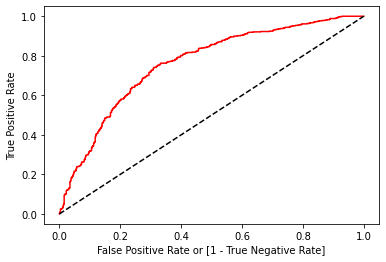

In [31]:
from sklearn.metrics import roc_auc_score,roc_curve
#logisitic Model
fpr,tpr,thresholds=roc_curve(y,log_model.predict_proba(X)[:,1])
auc_train=roc_auc_score(y_train,y_pred_train_log)
print(auc_train)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model ( area  = %0.2f)'%auc_train)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

0.8706950696116403


Text(0, 0.5, 'True Positive Rate')

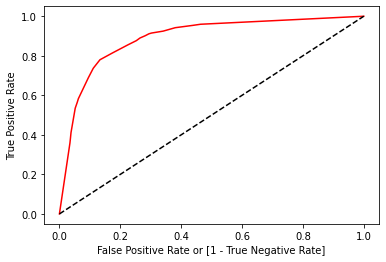

In [32]:
#DT Model
fpr,tpr,thresholds=roc_curve(y,dt_model.predict_proba(X)[:,1])
auc_train=roc_auc_score(y_train,y_pred_train_dt)
print(auc_train)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

0.9966345650580969


Text(0, 0.5, 'True Positive Rate')

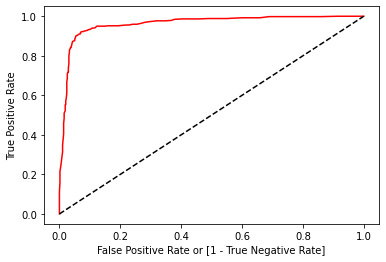

In [33]:
#RF Model
fpr,tpr,thresholds=roc_curve(y,rf_model.predict_proba(X)[:,1])
auc_train=roc_auc_score(y_train,y_pred_train_rf)
print(auc_train)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

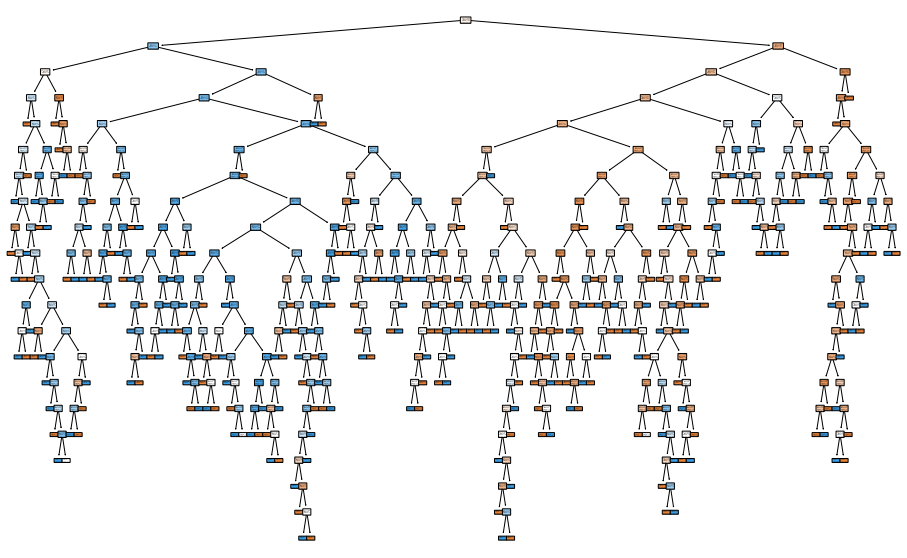

In [34]:
#Train Data
dt_train_model=DecisionTreeClassifier(max_depth=None).fit(X_train,y_train)
plt.figure(figsize=[16,10])
plot_tree(dt_train_model,rounded=True,filled=True)
plt.show()

#### 8.2 Test Data

In [35]:
#Logistic Model
print(classification_report(y_test,y_pred_test_log))

#DT Classifier
print(classification_report(y_test,y_pred_test_dt))

#RF Classifier
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66       112
           1       0.65      0.79      0.71       108

    accuracy                           0.69       220
   macro avg       0.70      0.69      0.68       220
weighted avg       0.70      0.69      0.68       220

              precision    recall  f1-score   support

           0       0.63      0.62      0.62       112
           1       0.61      0.62      0.61       108

    accuracy                           0.62       220
   macro avg       0.62      0.62      0.62       220
weighted avg       0.62      0.62      0.62       220

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       112
           1       0.63      0.60      0.62       108

    accuracy                           0.63       220
   macro avg       0.63      0.63      0.63       220
weighted avg       0.63      0.63      0.63       220



In [36]:
#Test Accuracy Log Model=69%
#Test Accuracy DT Classifier=70%
#Test Accuracy RF Model=60%

In [37]:
print(confusion_matrix(y_test,y_pred_test_log))
print(confusion_matrix(y_test,y_pred_test_dt))
print(confusion_matrix(y_test,y_pred_test_rf))

[[66 46]
 [23 85]]
[[69 43]
 [41 67]]
[[74 38]
 [43 65]]


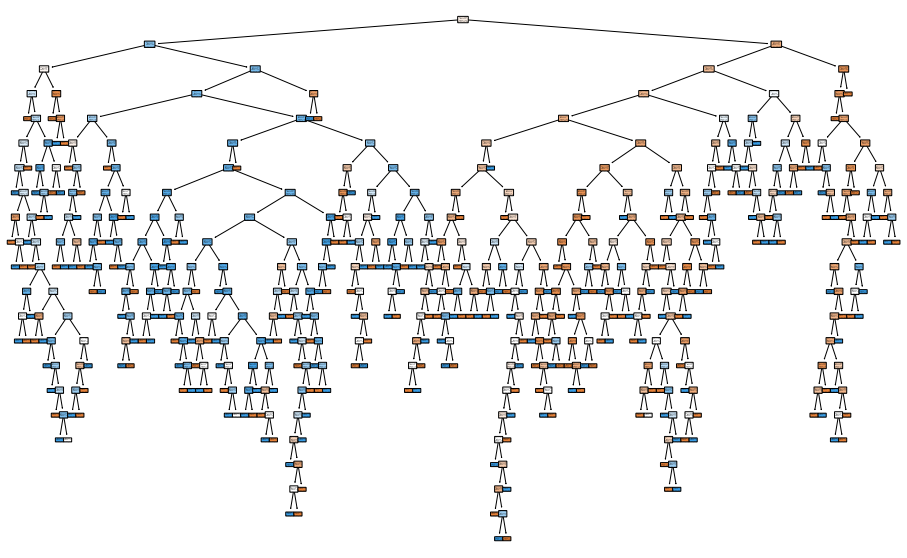

In [38]:
dt_train_model=DecisionTreeClassifier(max_depth=None).fit(X_train,y_train)
plt.figure(figsize=[16,10])
plot_tree(dt_train_model,rounded=True,filled=True)
plt.show()

0.6881613756613758


Text(0, 0.5, 'True Positive Rate')

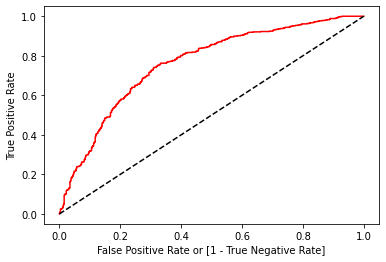

In [39]:
#Logistic Model
from sklearn.metrics import roc_auc_score,roc_curve
fpr_log,tpr_log,thresholds_log=roc_curve(y,log_model.predict_proba(X)[:,1])
auc_test_log=roc_auc_score(y_test,y_pred_test_log)
print(auc_test_log)

import matplotlib.pyplot as plt
plt.plot(fpr_log,tpr_log,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

0.6182208994708994


Text(0, 0.5, 'True Positive Rate')

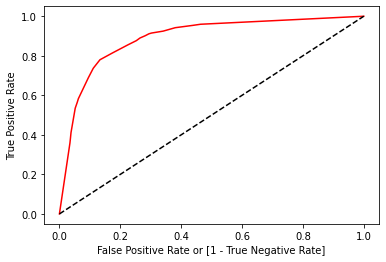

In [40]:
#Dt Classifier
fpr,tpr,thresholds=roc_curve(y,dt_model.predict_proba(X)[:,1])
auc_test=roc_auc_score(y_test,y_pred_test_dt)
print(auc_test)


plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

0.6312830687830688


Text(0, 0.5, 'True Positive Rate')

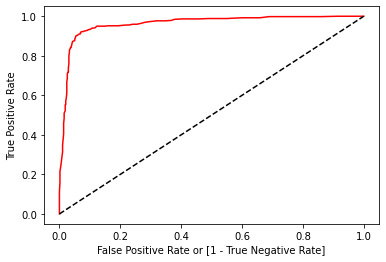

In [41]:
#RF Classifier
fpr,tpr,thresholds=roc_curve(y,rf_model.predict_proba(X)[:,1])
auc_test=roc_auc_score(y_test,y_pred_test_rf)
print(auc_test)


plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<function matplotlib.pyplot.show(close=None, block=None)>

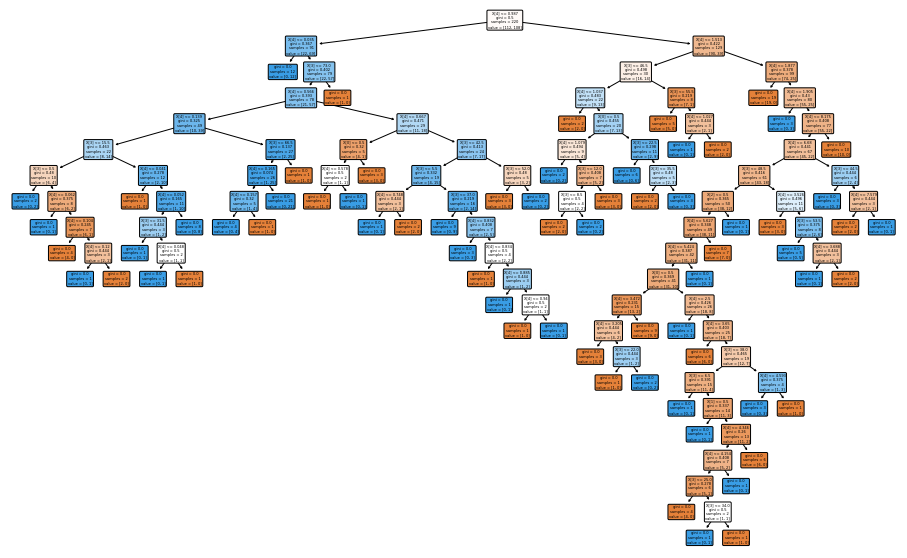

In [42]:
#test data
dt_test_model=DecisionTreeClassifier(max_depth=None).fit(X_test,y_test)
plt.figure(figsize=[16,10])
plot_tree(dt_test_model,rounded=True,filled=True)
plt.show

## 9. Dumping Python codes into Binary File-Serialization

In [43]:
from pickle import dump

In [44]:
dump(log_model,open('claimants_model.pkl','wb'))

In [45]:
from pickle import load

In [46]:
loaded_log_model=load(open('claimants_model.pkl','rb'))

In [47]:
loaded_log_model.score(X_test,y_test)

0.6863636363636364